## S12 T02 Tasca de web scraping
### Machine learning avançat
#### Eloi Canals

Nivell 1
- Exercici 1
Realitza web scraping d'una pàgina de la borsa de Madrid (https://www.bolsamadrid.es) utilitzant BeautifulSoup i Selenium.

In [1]:
# Importacions de llibreries

from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import Select
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Instanciem driver

driver = webdriver.Firefox()
driver.get("https://www.bolsamadrid.es")
assert "Bolsa de Madrid" in driver.title
acciones = driver.find_element_by_link_text('Acciones').click()
menu = Select(driver.find_element_by_id('SelSector'))
menu.select_by_visible_text('Tecnología y Telecomunicaciones')
consultar = driver.find_element_by_id('ctl00_Contenido_Consultar').click()

URL = driver.current_url
page = requests.get(URL)

In [3]:
# Start scrapping
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head data-analytics-id="UA-35966870-2" data-app-path="/" data-bolsa="BMadrid" data-hora-act="Mon, 21 Feb 2022 15:58:25 GMT" data-idioma="esp">
  <meta content="IE=11" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="Copyright © BME 2022" id="ctl00_copyright" name="copyright"/>
  <title>
   Bolsa de Madrid - Precios de la sesión
  </title>
  <link href="/esp/aspx/RSS/RSS.ashx?feed=Todo" id="ctl00_RSSLink1" rel="alternate" title="Bolsa de Madrid: Todos los contenidos agregados" type="application/rss+xml"/>
  <link href="/esp/aspx/RSS/RSS.ashx?feed=NotasPrensa" id="ctl00_RSSLink2" rel="alternate" title="Bolsa de Madrid: Notas de Prensa" type="application/rss+xml"/>
  <link href="/esp/aspx/RSS/RSS.ashx?feed=Regulacion" id="ctl00_RSSLink3" rel="alternate" t

In [4]:
# Scrapping del valor de les accions diari utilitzant Beautiful Soup

tabla = soup.find(id="ctl00_Contenido_tblAcciones")

rows = tabla.find_all('tr')
i=0
columns = []
header = []
for row in rows:
    if i==0:
        cols = row.find_all('th')
        cols=[x.text.strip() for x in cols]
        header.extend(cols)
    else:
        cols=row.find_all('td')
        cols=[x.text.strip() for x in cols]
        columns.append(cols)
    i+=1

print(header)
print(columns)

['Nombre', 'Últ.', '% Dif.', 'Máx.', 'Mín.', 'Volumen', 'Efectivo (miles €)', 'Fecha', 'Hora']
[['ACCIONA', '138,2000', '-1,00', '141,4000', '136,3000', '41.214', '5.702,05', '21/02/2022', '15:41:33'], ['ACERINOX', '11,3050', '-1,78', '11,7650', '11,2450', '605.916', '6.934,31', '21/02/2022', '15:42:42'], ['ACS', '22,0500', '-1,21', '22,5800', '21,8800', '401.711', '8.937,50', '21/02/2022', '15:42:31'], ['AENA', '150,3500', '0,53', '152,1500', '148,7000', '35.355', '5.313,97', '21/02/2022', '15:42:46'], ['ALMIRALL', '11,8100', '11,21', '11,8200', '10,7200', '1.100.096', '12.690,35', '21/02/2022', '15:42:31'], ['AMADEUS', '60,8600', '-0,78', '62,4800', '60,1600', '181.530', '11.102,11', '21/02/2022', '15:42:45'], ['ARCELORMIT.', '26,0400', '-3,20', '27,4150', '25,8300', '632.252', '16.713,77', '21/02/2022', '15:42:23'], ['B.SANTANDER', '3,2800', '-1,26', '3,3790', '3,2540', '20.057.455', '66.375,76', '21/02/2022', '15:42:46'], ['BA.SABADELL', '0,8880', '-1,81', '0,9218', '0,8822', '16.7

In [5]:
driver.close()

In [6]:
bolsa = pd.DataFrame(data=columns, columns=header)
bolsa.head()

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"138,2000","-1,00","141,4000","136,3000",41.214,"5.702,05",21/02/2022,15:41:33
1,ACERINOX,"11,3050","-1,78","11,7650","11,2450",605.916,"6.934,31",21/02/2022,15:42:42
2,ACS,"22,0500","-1,21","22,5800","21,8800",401.711,"8.937,50",21/02/2022,15:42:31
3,AENA,"150,3500","0,53","152,1500","148,7000",35.355,"5.313,97",21/02/2022,15:42:46
4,ALMIRALL,"11,8100","11,21","11,8200","10,7200",1.100.096,"12.690,35",21/02/2022,15:42:31


In [7]:
bolsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nombre              35 non-null     object
 1   Últ.                35 non-null     object
 2   % Dif.              35 non-null     object
 3   Máx.                35 non-null     object
 4   Mín.                35 non-null     object
 5   Volumen             35 non-null     object
 6   Efectivo (miles €)  35 non-null     object
 7   Fecha               35 non-null     object
 8   Hora                35 non-null     object
dtypes: object(9)
memory usage: 2.6+ KB


In [8]:
numerics = ['Últ.','% Dif.','Máx.','Mín.','Volumen','Efectivo (miles €)']

for i in numerics:
    bolsa[i] = bolsa[i].str.replace(r'.', '')
    bolsa[i] = bolsa[i].str.replace(r',', '.')
    bolsa[i] = bolsa[i].astype('float64')

<ipython-input-8-1b8d44f1f186>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  bolsa[i] = bolsa[i].str.replace(r'.', '')


In [9]:
bolsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre              35 non-null     object 
 1   Últ.                35 non-null     float64
 2   % Dif.              35 non-null     float64
 3   Máx.                35 non-null     float64
 4   Mín.                35 non-null     float64
 5   Volumen             35 non-null     float64
 6   Efectivo (miles €)  35 non-null     float64
 7   Fecha               35 non-null     object 
 8   Hora                35 non-null     object 
dtypes: float64(6), object(3)
memory usage: 2.6+ KB


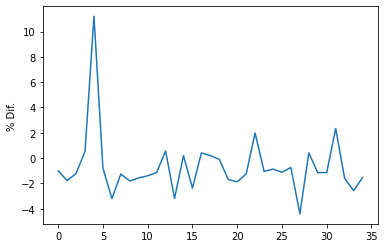

In [10]:
# Diferencies de volum de negoci de valors
sns.lineplot(data=bolsa['% Dif.'])
plt.show()

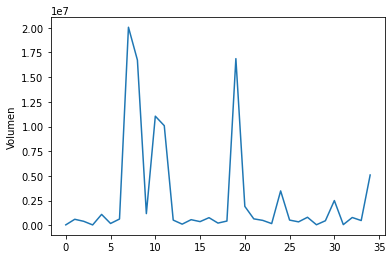

In [11]:
# Volum de transaccions
sns.lineplot(data=bolsa['Volumen'])
plt.show()

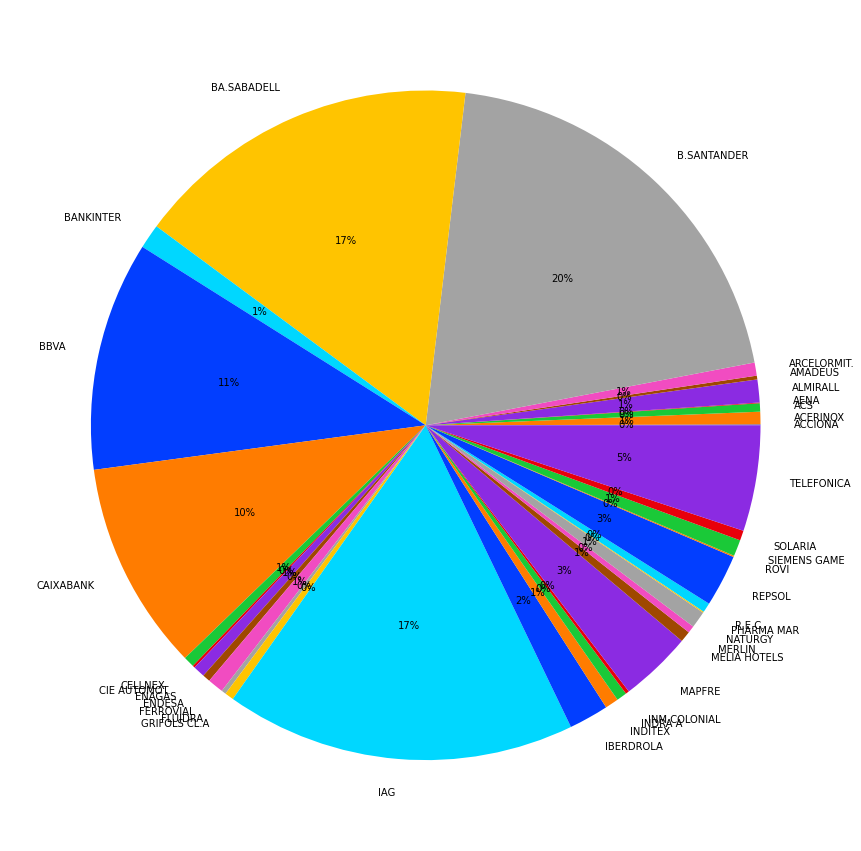

In [12]:
# Volum per empresa
fig, ax = plt.subplots(figsize=(15, 20))
labels = bolsa['Nombre']
colors = sns.color_palette('bright')

plt.pie(bolsa['Volumen'], labels=labels,colors = colors, autopct = '%0.0f%%')
plt.show()


In [13]:
# Exportem el dataset
bolsa.to_csv('stocks_20220221.csv')

Nivell 2
- Exercici 2
Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

In [14]:
# Document word a https://github.com/eloicase/web_scraping/DataSetDesc_EloiCanals.docx

Nivell 3 - Exercici 3

Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Scrapy. 

In [16]:
# Realitzarem un scrappy sobre la pagina web habitaclia buscant pisos a Sant Andreu, Barcelona

In [17]:
import scrapy
from scrapy.crawler import CrawlerProcess

In [18]:
# Instanciem el spider i el configurem
class MySpider(scrapy.Spider):
    name = "spider"
    
    # url
    def start_requests(self):
        urls = ['https://www.habitaclia.com/viviendas-sant_andreu-barcelona.htm',
                'https://www.habitaclia.com/viviendas-sant_andreu-barcelona-1.htm.htm',
                'https://www.habitaclia.com/viviendas-sant_andreu-barcelona-2.htm']
        for url in urls:
            yield scrapy.Request(url=url, callback=self.parse)
    
    # parsing the main div section with articles       
    def parse(self, response):
        articles1 = response.xpath('//div[@class="list-item-info"]')
        
        # extracció de dades
        for element in articles1:
            title = element.xpath('.//h3/a/@title').extract_first()
            neighborhood = element.xpath('.//p/span/text()').extract_first()
            price = element.xpath('.//span[@class="font-2"]/text()').extract_first()
            url = element.xpath('.//h3/a/@href').extract_first()
            description = element.xpath('.//p[@class="list-item-description"]/text()').extract_first()  

            # preparar dades per exportarles a un dataset          
            yield {
                'title': title,
                'neighborhood': neighborhood,
                'price': price,
                'url': url,
                'description': description,
            }

In [19]:
FILE_NAME = 'habitaclia_Sant_Andreu.csv'
SETTINGS = {
            'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)',
            'FEED_FORMAT': 'csv',
            'FEED_URI': FILE_NAME,
            'DOWNLOAD_DELAY': 1,
            } 

In [20]:
# Llencem l'spider
process = CrawlerProcess(SETTINGS)
process.crawl(MySpider) 
process.start()

2022-02-21 16:16:47 [scrapy.utils.log] INFO: Scrapy 2.5.1 started (bot: scrapybot)
2022-02-21 16:16:47 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.1.0, Python 3.8.8 (default, Apr 13 2021, 12:59:45) - [Clang 10.0.0 ], pyOpenSSL 20.0.1 (OpenSSL 1.1.1k  25 Mar 2021), cryptography 3.4.7, Platform macOS-10.13.6-x86_64-i386-64bit
2022-02-21 16:16:47 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2022-02-21 16:16:47 [scrapy.crawler] INFO: Overridden settings:
{'DOWNLOAD_DELAY': 1,
 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2022-02-21 16:16:48 [scrapy.extensions.telnet] INFO: Telnet Password: 29c9ab09362f237a
2022-02-21 16:16:48 [py.warnings] WARNING: /Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/scrapy/extensions/feedexport.py:247: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS`

2022-02-21 16:16:48 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.habitaclia.com/viviendas-sant_andreu-barcelona.htm>
{'title': 'Casa  en  Sant Andreu. Casa con 3 habitaciones con calefacción y aire acondicionado', 'neighborhood': 'Barcelona - Sant Andreu', 'price': '580.000 €', 'url': 'https://www.habitaclia.com/comprar-casa-con_3_habitaciones_con_calefaccion_y_aire_acondicionado_sant_andreu-barcelona-i4553004323348.htm?f=&from=list&lo=55', 'description': 'Excepcional casa distribuida en dos plantas con patio y  terraza. Situada en inmejorable ubicación próxima al ayuntamien...'}
2022-02-21 16:16:48 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.habitaclia.com/viviendas-sant_andreu-barcelona.htm>
{'title': 'Piso  Carrer del pare manyanet. Finca joven con vistas panorámicas en excelente zona.', 'neighborhood': 'Barcelona - Sant Andreu', 'price': '461.000 €', 'url': 'https://www.habitaclia.com/comprar-piso-finca_joven_con_vistas_panoramicas_en_excelente_zona_san

2022-02-21 16:16:49 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.habitaclia.com/viviendas-sant_andreu-barcelona-1.htm.htm>
{'title': 'Ático  Carrer de la residència. Ático con balcón totalmente reformado.', 'neighborhood': 'Barcelona - Sant Andreu', 'price': '249.000 €', 'url': 'https://www.habitaclia.com/comprar-atico-con_balcon_totalmente_reformado_sant_andreu-barcelona-i3118004332692.htm?pag=1&f=&from=list&lo=55', 'description': '*752,09€ cuota mensual hipoteca fija. Ático con balcón totalmente reformado, 7ª planta real de altura. 65m2. distribuid...'}
2022-02-21 16:16:49 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.habitaclia.com/viviendas-sant_andreu-barcelona-1.htm.htm>
{'title': 'Piso  Carrer de mossèn quintí mallofré. Ascensor, balcon, exterior', 'neighborhood': 'Barcelona - Sant Andreu', 'price': '320.000 €', 'url': 'https://www.habitaclia.com/comprar-piso-ascensor_balcon_exterior_sant_andreu-barcelona-i12636002516032.htm?pag=1&f=&from=list&lo=55', 

2022-02-21 16:16:50 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.habitaclia.com/viviendas-sant_andreu-barcelona-2.htm>
{'title': 'Piso  Carrer gran de sant andreu. 122m², 4 hab. + vestidor, 2 baños completos, exterior con 2 balc', 'neighborhood': 'Barcelona - Sant Andreu', 'price': '484.000 €', 'url': 'https://www.habitaclia.com/comprar-piso-122m2_4_hab_vestidor_2_banos_completos_exterior_con_2_balc_sant_andreu-barcelona-i4027004298161.htm?pag=2&f=&from=list&lo=55', 'description': 'Dolça Llar presenta en exclusiva este excelente piso totalmente exterior orientado al este (Mar) y oeste (montaña) de 12...'}
2022-02-21 16:16:50 [scrapy.core.scraper] DEBUG: Scraped from <200 https://www.habitaclia.com/viviendas-sant_andreu-barcelona-2.htm>
{'title': 'Piso  Carrer residencia. Gran oportunidad', 'neighborhood': 'Barcelona - Sant Andreu', 'price': '182.000 €', 'url': 'https://www.habitaclia.com/comprar-piso-gran_oportunidad_sant_andreu-barcelona-i34241004297107.htm?pag=2&f=&from

In [98]:
# Carreguem el dataset
df=pd.read_csv('habitaclia_Sant_Andreu.csv')

In [99]:
df.head()

,title,neighborhood,price,url,description
0,Casa adosada Carrer de cabrera. Casa adosada,Barcelona - Sant Andreu,450.000 €,https://www.habitaclia.com/comprar-casa_adosad...,Casa a reformar de 222m2. Situada al centre de...
1,Piso en Sant Andreu. Oportunidad! piso para ...,Barcelona - Sant Andreu,169.000 €,https://www.habitaclia.com/comprar-piso-oportu...,Para más información o concertar visita podéis...
2,Casa en Sant Andreu. Casa con 3 habitaciones...,Barcelona - Sant Andreu,580.000 €,https://www.habitaclia.com/comprar-casa-con_3_...,Excepcional casa distribuida en dos plantas co...
3,Piso Carrer de joan torras. Sant andreu centr...,Barcelona - Sant Andreu,339.900 €,https://www.habitaclia.com/comprar-piso-sant_a...,Increíble oportunidad en el emblemático barrio...
4,Piso Carrer de malats. Piso con plaza de par...,Barcelona - Sant Andreu,279.990 €,https://www.habitaclia.com/comprar-piso-con_pl...,Le presentamos este fantástico inmueble de 4 h...


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         97 non-null     object
 1   neighborhood  97 non-null     object
 2   price         97 non-null     object
 3   url           97 non-null     object
 4   description   97 non-null     object
dtypes: object(5)
memory usage: 3.9+ KB


In [101]:
df['price'].head()

0    450.000 €
1    169.000 €
2    580.000 €
3    339.900 €
4    279.990 €
Name: price, dtype: object

In [102]:
# transformem el pre el numeric
df['price'] = df['price'].replace('[\ €,]', '', regex=True)
df['price'] = df['price'].replace('[,]', '.', regex=True)

In [103]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         97 non-null     object 
 1   neighborhood  97 non-null     object 
 2   price         96 non-null     float64
 3   url           97 non-null     object 
 4   description   97 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.9+ KB


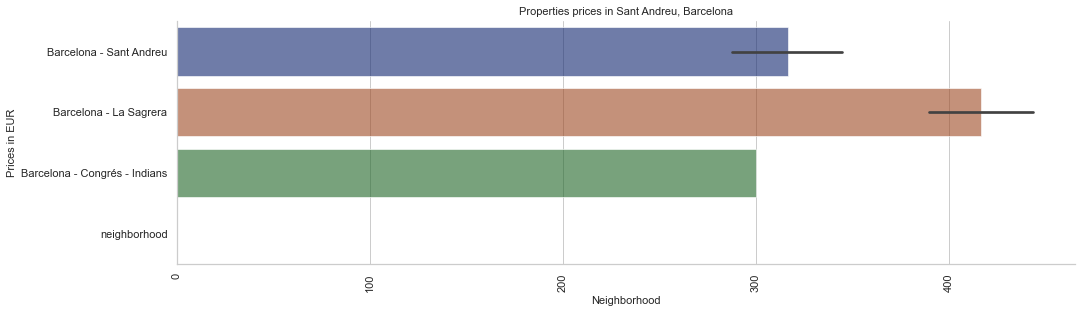

In [106]:
sns.set_theme(style="whitegrid")

sns.catplot(data=df, kind="bar",x="price", y="neighborhood",palette="dark", alpha=.6, height=4, aspect=15/4)
plt.xlabel("Neighborhood",fontsize=11)
plt.ylabel("Prices in EUR",fontsize=11)
plt.title("Properties prices in Sant Andreu, Barcelona",fontsize=11)
plt.xticks(rotation=90)
plt.show()